# Table of contents

<ul>
<li>Why we use Numpy?</li>
<li>Creating & inspecting array</li>
<li>Indexing & slicing</li>
<li>Operators</li>
<li>Mask & filter</li>
<li>Copy vs view</li>
<li>Array manipulation</li>
<li>Understanding axes</li>
<li>Broadcasting</li>
<li>Sparse matrix</li>
<ul>

# Why we use Numpy?

<li>Arrays use less memory than lists</li>
<li>Arrays require data to be homogeneous; lists do not</li>
<li>Arrays are fixed size but lists are dynamic</li>
<li>Arithmetic on arrays operates like matrix multiplication</li>

In [2]:
import numpy as np

In [2]:
my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 13.8 ms, sys: 17.2 ms, total: 31 ms
Wall time: 32.6 ms


In [4]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 731 ms, sys: 170 ms, total: 901 ms
Wall time: 979 ms


#### NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.

In [5]:
np.array([1, 1.0, 'salam']) # All of the elements have same datatype.

array(['1', '1.0', 'salam'], dtype='<U32')

In [6]:
np.array([1, 1.0])

array([1., 1.])

# Creating & inspecting array

In [7]:
np.array([1,2,3])

array([1, 2, 3])

In [8]:
l = [1,2,3]
np.array(l)

array([1, 2, 3])

In [3]:
data = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
data

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [10]:
data.ndim

2

In [11]:
data.shape

(2, 4)

In [12]:
data.dtype

dtype('int64')

In [13]:
data.size

8

In [14]:
len(data) # Length of outer array

2

In [15]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
np.arange(1,11, 2)

array([1, 3, 5, 7, 9])

In [17]:
np.linspace(0,2,9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [18]:
np.ones(2)

array([1., 1.])

In [19]:
np.ones(2, 'int')

array([1, 1])

In [20]:
np.ones((2, 2, 3), 'int')

array([[[1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1]]])

In [21]:
np.full((3,3), 4)

array([[4, 4, 4],
       [4, 4, 4],
       [4, 4, 4]])

In [22]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [33]:
np.random.random((3,2))

array([[0.17881047, 0.44866551],
       [0.36935484, 0.15879575],
       [0.2191621 , 0.43498735]])

In [36]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [38]:
np.empty((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
np.empty_like(data)

# Indexing & slicing

In [39]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
a[0]

0

In [41]:
a[2:5:2]

array([2, 4])

In [42]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [43]:
l = [[1,2,3], [4,5,6]]
b = np.array(l)
b

array([[1, 2, 3],
       [4, 5, 6]])

In [44]:
l[0][0]

1

In [45]:
l[0,0]

TypeError: list indices must be integers or slices, not tuple

In [46]:
b[0][0]

1

In [47]:
b[0,0]

1

In [48]:
b[0, 1] = 5
b

array([[1, 5, 3],
       [4, 5, 6]])

In [49]:
b[:, -2:]

array([[5, 3],
       [5, 6]])

In [50]:
b[0, ::2]

array([1, 3])

In [51]:
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

row = np.array([1, 2, 3])
col = np.array([0, 1, 0])

a[row, col]

array([ 4,  8, 10])

# Operators

In [52]:
a = [1,2,3]
b = [1,1,1]
y = []
for i1, i2 in zip(a, b):
    y.append(i1+i2)
y

[2, 3, 4]

In [53]:
y = []
for items in zip(a, b):
    y.append(sum(items))
y

[2, 3, 4]

In [54]:
a = np.array(a)
b = np.array(b)

a + b

array([2, 3, 4])

In [55]:
np.add(a, b)

array([2, 3, 4])

In [56]:
a - b

array([0, 1, 2])

In [57]:
np.subtract(a, b)

array([0, 1, 2])

In [58]:
a * b

array([1, 2, 3])

In [59]:
np.multiply(a, b)

array([1, 2, 3])

In [60]:
a / b

array([1., 2., 3.])

In [61]:
np.divide(a, b)

array([1., 2., 3.])

### Comparison

In [62]:
print(a, b)

[1 2 3] [1 1 1]


In [63]:
a == b

array([ True, False, False])

In [64]:
all(a == b)

False

In [66]:
a = np.array([1,2,3])
b = np.array([1,2])

In [67]:
a == b # Element-wise

/var/folders/71/qlp131z56q36tnvdzk13zwp80000gn/T/ipykernel_11640/4271443027.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  a == b # Element-wise


False

In [68]:
np.array_equal(a, b) # Array-wise

False

# Mask & filter

In [ ]:
# There are two types of mask:
# 1) True, False mask -> same size as main array
# 2) Numeric mask -> size <= size of main array

### True, False

In [69]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Mask

In [70]:
mask = a > 4 # Element-wise operator
mask

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

#### Filter

In [71]:
a[mask]

array([5, 6, 7, 8, 9])

In [72]:
a[a>4]

array([5, 6, 7, 8, 9])

In [73]:
a[(a>4) & (a<8)]

array([5, 6, 7])

In [74]:
a[~((a>4) & (a<8))]

array([0, 1, 2, 3, 4, 8, 9])

In [75]:
a[(a > 6) | (a < 3)]

array([0, 1, 2, 7, 8, 9])

In [76]:
a[a%2 == 0]

array([0, 2, 4, 6, 8])

### Numeric mask

In [77]:
a = np.arange(10, 20)
a

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [78]:
a[np.arange(3,10, 2)]

array([13, 15, 17, 19])

# Copy vs view

In [79]:
a = np.array([1,2,3])

In [80]:
b = a.view()
b

array([1, 2, 3])

In [81]:
b[0] = 0
b

array([0, 2, 3])

In [82]:
a

array([0, 2, 3])

In [83]:
b = a.copy()
# b = np.copy(a) # Same as above
b

array([0, 2, 3])

In [84]:
b[0] = -1
b

array([-1,  2,  3])

In [85]:
a

array([0, 2, 3])

In [86]:
a = np.array([1,2,3])
b = np.copy(a)
c = a.view()

In [87]:
print(b.base)
print(c.base)

None
[1 2 3]


# Array manipulation

In [88]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

#### Reshape

In [89]:
a.reshape(3, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [90]:
a.reshape(2, 3, 2)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [91]:
a.reshape(4, -1)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [92]:
a.reshape(-1, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

#### Flat

In [96]:
b = a.reshape(3, -1)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [97]:
b.reshape(-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [98]:
b.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [99]:
b.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

#### Transpose

In [100]:
b.transpose()

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [101]:
b.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

#### Convert to python list

In [102]:
b.tolist()

[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]]

In [103]:
list(b) # Dont't use this syntax

[array([0, 1, 2, 3]), array([4, 5, 6, 7]), array([ 8,  9, 10, 11])]

#### Change datatype

In [104]:
b.astype(np.float64)

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

#### Split

In [105]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [106]:
np.array_split(a, 4)

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8]), array([ 9, 10, 11])]

#### Append & insert

In [107]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [108]:
np.append(a, 12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [109]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [110]:
np.append(a, [12, 13, 14])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [111]:
c = np.append(a, [12, 13, 14])
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [113]:
np.insert(a, 2, [10, 11]) # Insert 10 before index 2

array([ 0,  1, 10, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

# Understanding axes

In [ ]:
# axis = 0 -> Dimension 0 (Rows in 2D array)
# axis = 1 -> Dimension 1 (Columns in 2D array)
# ...

#### Delete

In [114]:
arr = np.arange(12).reshape(3, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [115]:
np.delete(arr, 3) # Deletes 3 from arr

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11])

In [116]:
np.delete(arr, 2, axis=0) # Deletes row on index 2 of arr

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [117]:
np.delete(arr, 2, 0)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [118]:
np.delete(arr, 3, axis=1) # Deletes column on index 3 of arr

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10]])

In [119]:
np.delete(arr, 3, 1)

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10]])

#### Concatenate

In [143]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [121]:
b = np.array([[5, 6]])
b

array([[5, 6]])

In [122]:
print(a.shape)
print(b.shape)

(2, 2)
(1, 2)


In [123]:
np.concatenate((a, b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [124]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [126]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

In [127]:
np.concatenate((a, b), axis=None)

array([1, 2, 3, 4, 5, 6])

In [ ]:
# axis = 0 -> Dimension 0 (Columns in 2D array)
# axis = 1 -> Dimension 1 (Rows in 2D array)
# ...

#### Sum

In [128]:
x = np.array([[1,2],[3,4]])
print(x)
print(np.sum(x))  # Compute sum of all elements

[[1 2]
 [3 4]]
10


In [129]:
print(np.sum(x, axis=0))  # Compute sum of each column

[4 6]


In [130]:
print(np.sum(x, axis=1))  # Compute sum of each row

[3 7]


#### Max

In [131]:
np.max(x) # Find max between all elements

4

In [132]:
np.max(x, axis=None)

4

In [133]:
np.max(x, axis=0) # Find max for each column

array([3, 4])

In [134]:
np.max(x, axis=1) # Find max for each row

array([2, 4])

# Broadcasting

In [135]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [136]:
a + 5

array([5, 6, 7])

In [137]:
m = np.ones((3, 3))
m + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

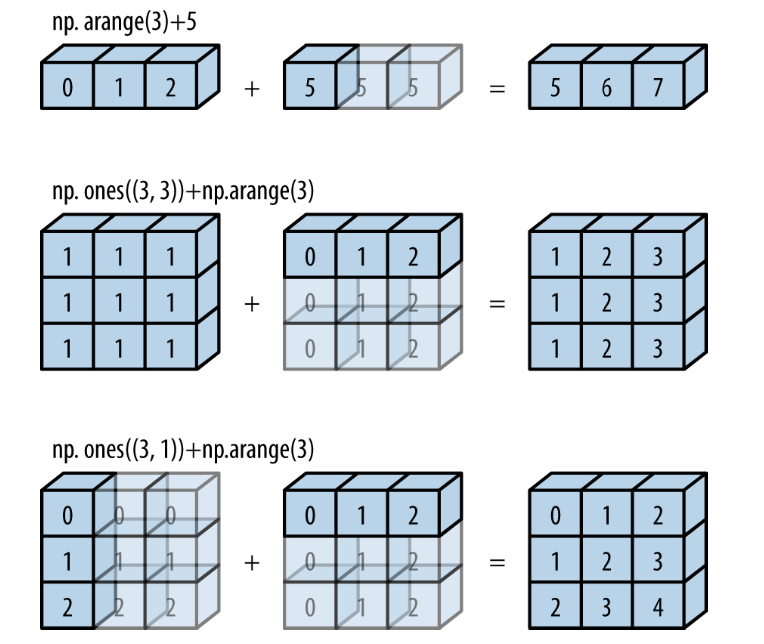

# Sparse matrix

In [139]:
from scipy import sparse

In [140]:
matrix_large = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                         [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

matrix_large_sparse = sparse.csr_matrix(matrix_large)
print(matrix_large_sparse)

  (1, 1)	1
  (2, 0)	3
